# Exploración de datos (EDA)

**Proyecto:** Análisis de comportamiento de clientes en un _e-commerce_

**Autor:** Sergio Naranjo Burgo

---

## Objetivo

En este _noteboook_ se realiza un análisis exploratorio del conjunto de datos limpio de ventas _online_.

Se buscan patrones en:
- Ventas por país
- Productos más vendidos
- Clientes más valiosos
- Series temporales de ventas

In [12]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir rutas de archivos
ruta_processed = "../data/processed/online_retail_clean.csv"   # CSV limpio

# Estilo profesional para gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

## 1.- Carga de datos

Se carga el conjunto de datos limpio desde 'data/processed/online_retail_clean.csv'.

In [2]:
df = pd.read_csv(ruta_processed)

# Mostrar las primeras filas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2.- Resumen de ventas

Se calcula el número total de transacciones, productos distintos, clientes únicos y ventas totales.

In [3]:
# Número de transacciones
num_facturas = df['InvoiceNo'].nunique()
# Número de productos distintos
num_productos = df['StockCode'].nunique()
# Número de clientes únicos
num_clientes = df['CustomerID'].nunique()
# Ventas totales
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
ventas_totales = df['TotalPrice'].sum()

print(f"Transacciones: {num_facturas}")
print(f"Productos distintos: {num_productos}")
print(f"Clientes únicos: {num_clientes}")
print(f"Ventas totales: £{ventas_totales:,.2f}")

Transacciones: 18477
Productos distintos: 3663
Clientes únicos: 4330
Ventas totales: £8,427,486.56


## 3.- Ventas por país

Se analizan las ventas totales y el número de transaccones por país.

C:\Users\Sergio\AppData\Local\Temp\ipykernel_22160\1051523544.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_pais.values, y=ventas_pais.index, palette="viridis")


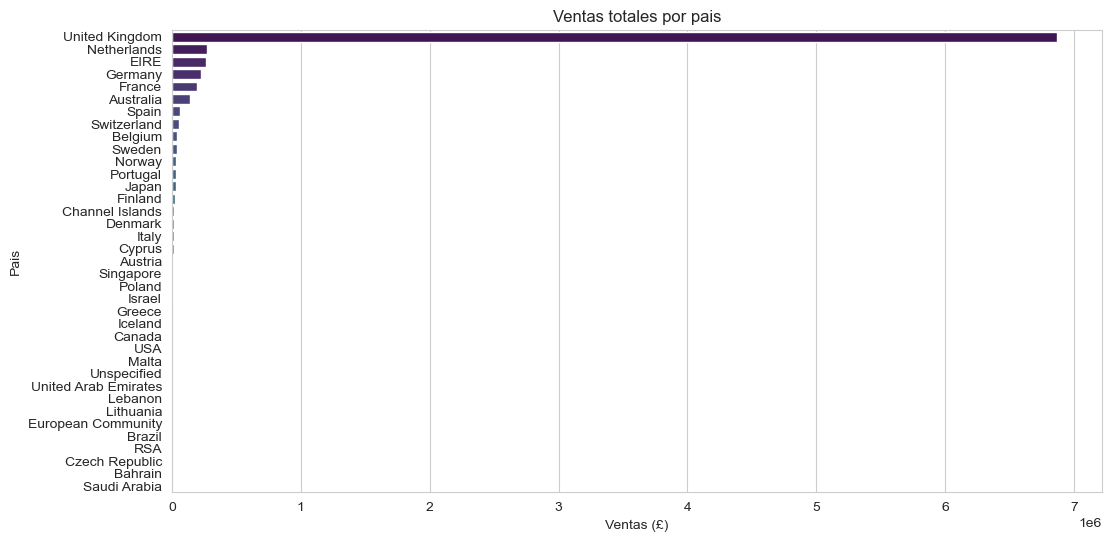

In [5]:
ventas_pais = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
transacciones_pais = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Gráfico: Ventas por pais
sns.barplot(x=ventas_pais.values, y=ventas_pais.index, palette="viridis")
plt.title("Ventas totales por pais")
plt.xlabel("Ventas (£)")
plt.ylabel("Pais")
plt.show()

## 4.- Productos más vendidos

Se identifican los 10 productos con mayor número de unidades vendidas.

C:\Users\Sergio\AppData\Local\Temp\ipykernel_22160\2513439019.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_vendidos.values, y=productos_vendidos.index, palette="magma")


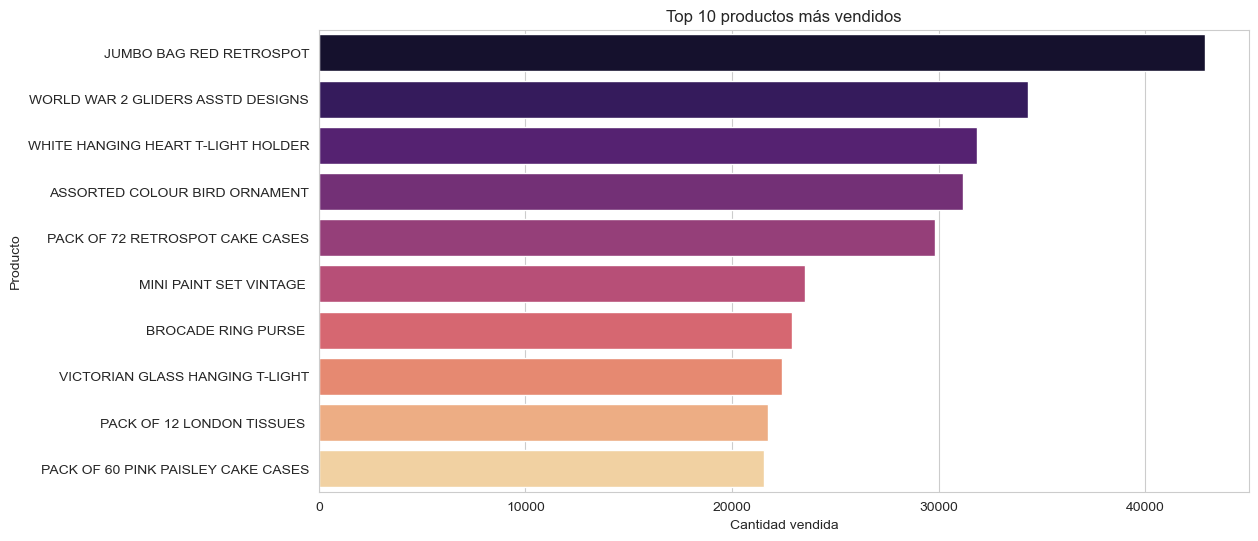

In [6]:
productos_vendidos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=productos_vendidos.values, y=productos_vendidos.index, palette="magma")
plt.title("Top 10 productos más vendidos")
plt.xlabel("Cantidad vendida")
plt.ylabel("Producto")
plt.show()

## 5.- Clientes más valiosos

Se identifican los 10 clientes que más han gastado en total.

C:\Users\Sergio\AppData\Local\Temp\ipykernel_22160\3915836815.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clientes_valiosos.values, y=clientes_valiosos.index, palette="coolwarm")


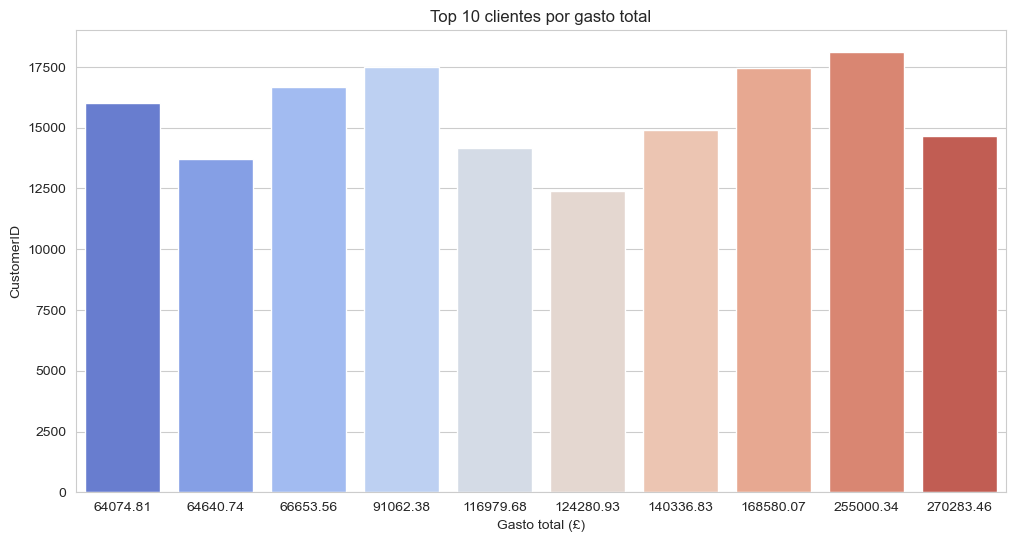

In [8]:
clientes_valiosos = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=clientes_valiosos.values, y=clientes_valiosos.index, palette="coolwarm")
plt.title("Top 10 clientes por gasto total")
plt.xlabel("Gasto total (£)")
plt.ylabel("CustomerID")
plt.show()

## 6.- Ventas a lo largo del tiempo

Se analiza la evolución de las ventas por mes.

C:\Users\Sergio\AppData\Local\Temp\ipykernel_22160\3710338638.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mensuales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()


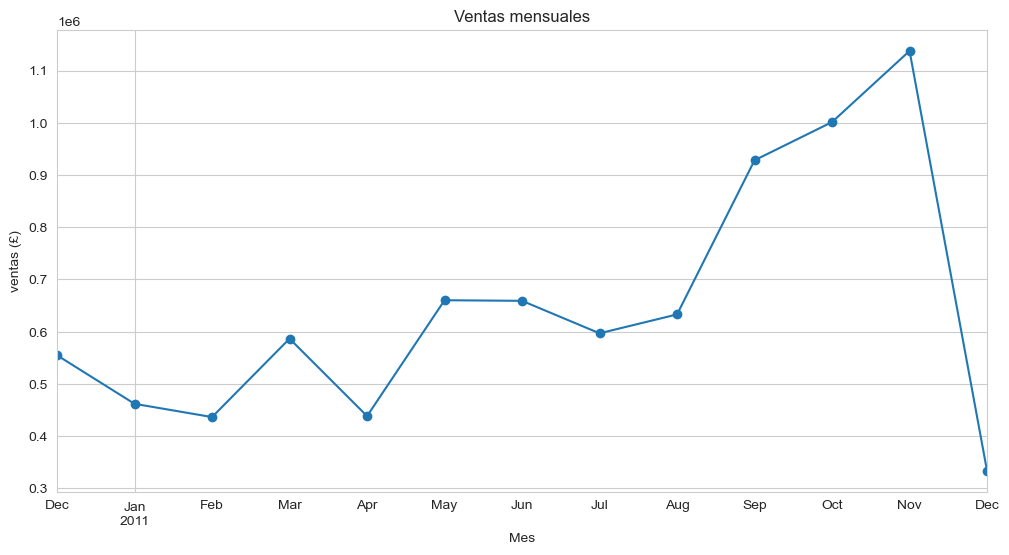

In [11]:
# Convertir InvoiceDate a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=False)

# Ventas por mes
ventas_mensuales = df.resample('M', on='InvoiceDate')['TotalPrice'].sum()

ventas_mensuales.plot(kind='line', marker='o')
plt.title("Ventas mensuales")
plt.xlabel("Mes")
plt.ylabel("ventas (£)")
plt.show()

## Conclusiones del EDA

- Reino Unido domina claramente las ventas, aunque hay clientes internacionales.
- Los productos más vendidos sulen ser artículos de bajo precio pero alta demanda.
- Un pequeño grupo de clientes realiza una parte significativa del gasto total.
- Las ventas muestran patrones estacionales, con picos en ciertos meses.

Estos _insights_ son útiles para:

- Estrategias de _marketing_ y promociones
- Identificación de clientes VIP
- Planificación de inventaro y logística